## Cohort Analysis

Understand customers based on their unique behavioral attributes.

It is a powerful analytics technique to group customers and enable the business to customize their product offering and marketing strategy. For example, we can grup the customers by the month of the first purchase, segment by their recency, frequency and monetary values or run k-means clusterng to identify similar groups of customers based on their purchasing behavior. You will dig deeper into customer purchasing habits and uncover actionable insights.

Cohort analysis is a descriptive analytics tool. It groups the customers into mutually exclusive cohorts - which are then measured over time. Cohort analysis provides deeper insights than the so-called vanity metrics, it helps with understanding the high level trends better by providing insights on metrics across both the product and the customer lifecycle.

### There are tree major types of cohorts:

- Time cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohors shows the customer's behavior depending on the time they started using the company's productos or services. The time may be monthly or quarterly, even daily.

- Behavior cohorts are customers who purchased a product or subscribed to a service in the past, it groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the need of the various cohorts can be help a company design custom-made services or products for particular segments.

- Size cohorts refer to the various sizes of customers who purchase company's products or services. This categorization can be based on the amount of spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time.

#### The main elements of the cohort analysis:

- The cohorts analysis data is typically formatted as a pivot table.
- The row values represent the cohort. In this case it's the month of the first purchase and customers are poled into these groups based on their first ever purchase.
- The column values represent months since acquisition. It can be measured in other time periods like months, days, even hours or minutes. That depends on the scope of the analysis.
- Finally, the metrics are in the table. Here, we have the count of active customers. The first column with cohort index 'one' represents the total number of customers in that cohort. This is the month of their first transaction. We will use this data in the next lessons to calculate the retention rate and other metrics.

#### Resume
- What is Cohort Analysis?

    - Mutually exclusive segments - cohorts
    - Compare metrics across product lifecycle
    - Compare metrics across customer lifecycle

- Types of cohorts

    - Time cohorts
    - Behavior cohorts
    - Size cohorts
    
- Elements of the cohort analysis

    - Pivot table
    - Assigned cohort in rows
    - Cohort index in columns
    - Metrics in the table

In [61]:
import pandas as pd
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO

#### Read ZipFile from URL

In [62]:
z = urlopen('https://assets.datacamp.com/production/repositories/3202/datasets/40378e0b8f88bffddc938f335bc68baa8fdf0b18/chapter_1.zip')
myzip = ZipFile(BytesIO(z.read())).extract('online.csv')
online = pd.read_csv(myzip)

In [63]:
online.set_index('Unnamed: 0', inplace=True)

In [64]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Unnamed: 0,,,,,,,,
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [65]:
del online.index.name

In [66]:
online.to_csv('Data/online.csv')

In [67]:
online = pd.read_csv('Data/online.csv', index_col=0, parse_dates=['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [68]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


### Assign daily acquisition cohort

defining a cohort is the first step to cohort analysis. You will now create daily cohorts based on the day each customer has made their first transaction.

In [70]:
import datetime

In [53]:
# Datacamp way

# # Define a function that will parse the date
# def get_day(x): return datetime.datetime(x.year, x.month, x.day) 

# # Create InvoiceDay column
# online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

In [71]:
online['InvoiceDay'] = online['InvoiceDate'].dt.date

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

In [72]:
# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


In [54]:
online.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
InvoiceDay     datetime64[ns]
CohortDay      datetime64[ns]
dtype: object

In [79]:
online['CohortIndex'] = (online.InvoiceDay - online.CohortDay).dt.days + 1

In [82]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,198
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,70
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,90


In [87]:
online.query('CustomerID == 13933')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
263742,560034,23198,PANTRY MAGNETIC SHOPPING LIST,12,2011-07-14 13:35:00,1.45,13933,United Kingdom,2011-07-14,2011-07-14,1
308870,564055,22835,HOT WATER BOTTLE I AM SO POORLY,8,2011-08-22 14:03:00,4.65,13933,United Kingdom,2011-08-22,2011-07-14,40


#### Customer retention :

Retention gives you the percentage of active customers compared to the total number of customers.

### Calculate retention rate from scratch

The retention measures how many customers from each of the cohort have returned in the subsequent months.

- select the first column which is the total number of customers in the cohort
- calculate the ratio of how many of these customers came back in the subsequent months which is the retention rate

Note: you will see that the first month's retention -by definition- will be 100% for all cohorts, this is because the number of active customers in the first month is actually the size of the cohort

You have seen how to create retention and average quantity metrics table for the monthly acquisition cohorts. 

In [210]:
online = pd.read_csv('Data/online.csv', index_col=0, parse_dates=['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [211]:
def get_month(x): return datetime.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

grouping = online.groupby('CustomerID')['InvoiceMonth']

online['CohortMonth'] = grouping.transform('min')

online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [212]:
import numpy as np

online['CohortIndex'] = ((online.InvoiceMonth - online.CohortMonth)/np.timedelta64(1, 'M')).round().astype(int) + 1 

online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4
125615,547051,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-03-20 12:06:00,0.42,12902,United Kingdom,2011-03-01,2011-03-01,1
483123,577493,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-11-20 12:13:00,0.85,17323,United Kingdom,2011-11-01,2011-02-01,10
449888,575143,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-11-08 15:37:00,2.08,13643,United Kingdom,2011-11-01,2011-09-01,3
127438,547223,22934,BAKING MOULD EASTER EGG WHITE CHOC,2,2011-03-21 15:10:00,2.95,12867,United Kingdom,2011-03-01,2010-12-01,4
189515,553156,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2011-05-13 14:58:00,0.55,17841,United Kingdom,2011-05-01,2010-12-01,6


In [213]:
online.dtypes

InvoiceNo                int64
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID               int64
Country                 object
InvoiceMonth    datetime64[ns]
CohortMonth     datetime64[ns]
CohortIndex              int32
dtype: object

In [214]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [215]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].nunique().reset_index()
cohort_data.head(15)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245
5,2010-12-01,6,285
6,2010-12-01,7,249
7,2010-12-01,8,236
8,2010-12-01,9,240
9,2010-12-01,10,265


In [216]:
# Create a pivot 
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.div(cohort_sizes, axis=0).round(3).mul(100)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate average price
You will now calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

In [218]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()
cohort_data.head(15)

CohortMonth  CohortIndex
2010-12-01   1              3.035915
             2              3.044060
             3              2.995071
             4              2.835175
             5              2.727067
             6              6.915204
             7              2.799492
             8              2.975229
             9              2.723557
             10             2.662417
             11             2.969708
             12             2.835004
             13             2.633262
2011-01-01   1              3.162917
             2              3.141353
Name: UnitPrice, dtype: float64

In [219]:
# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,UnitPrice
0,2010-12-01,1,3.035915
1,2010-12-01,2,3.044060
2,2010-12-01,3,2.995071
3,2010-12-01,4,2.835175
4,2010-12-01,5,2.727067


In [220]:
# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12-01   3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01-01   3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02-01   3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03-01   3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04-01   3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05-01   3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06-01   2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07-01   3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08-01   2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09-01   2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10-01   2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

### Cohort analysis visualization

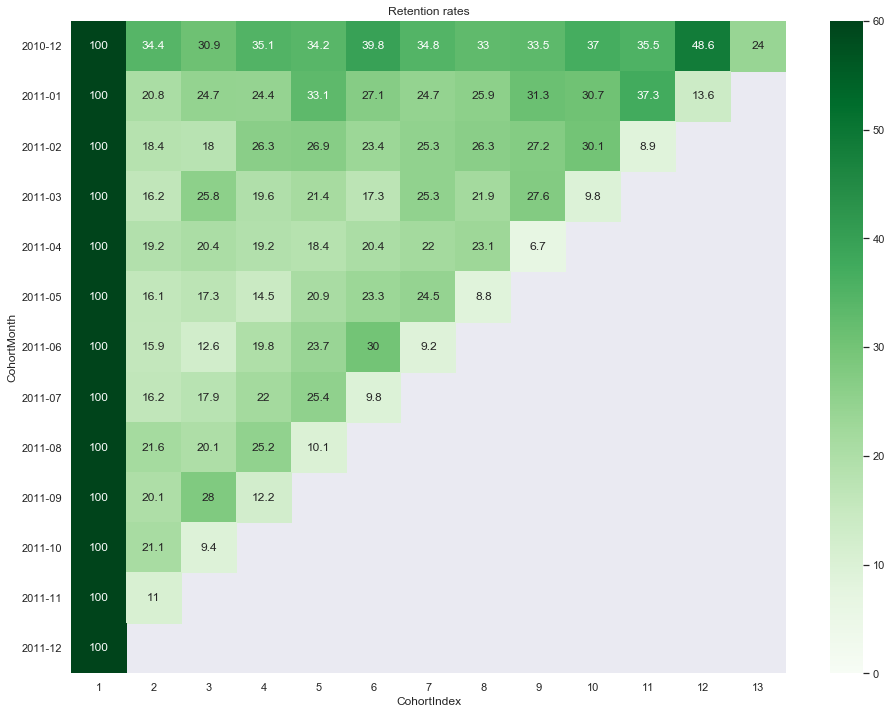

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            fmt = 'g',
            vmin = 0,
            vmax = 60,
            cmap = 'Greens'
           )

ax.set_yticklabels(retention.index.strftime('%Y-%m'))

plt.show()

Source: Datacamp